# Analyse Exploratoire

### Import des modules

In [30]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from projet_3_struct.funcs import (
    Multi_usage,
    )

from projet_3_struct.funcs_nettoyages import (
    reassignation_type, retirer_colonnes_inutiles, normalisation_ecriture,
    normalisation_buildingtype, reassignation_outlier, ajout_usage_multiple,
    drop_mono_family_et_campus, filtre_energy_gt0, filtre_co2_gt0,
    add_part_habitation, filter_non_hab_gt0, log_counts
)
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Analyse Exploratoire

In [31]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [32]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [33]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [34]:
#Affichage des informations selon le type de variable qualitatives ou quantitaves

for col in building_consumption.columns:
    print(f"### Colonne : {col}\n")
        
    if building_consumption[col].dtype == "object" or str(building_consumption[col].dtype) == "category":
        print("Variable qualitative\n")
        print(building_consumption[col].value_counts(dropna=False))
    else:
        print("Variable quantitative\n")
        print(building_consumption[col].describe())
        
    print("\n" + "-"*50 + "\n")

### Colonne : OSEBuildingID

Variable quantitative

count     3376.000000
mean     21208.991114
std      12223.757015
min          1.000000
25%      19990.750000
50%      23112.000000
75%      25994.250000
max      50226.000000
Name: OSEBuildingID, dtype: float64

--------------------------------------------------

### Colonne : DataYear

Variable quantitative

count    3376.0
mean     2016.0
std         0.0
min      2016.0
25%      2016.0
50%      2016.0
75%      2016.0
max      2016.0
Name: DataYear, dtype: float64

--------------------------------------------------

### Colonne : BuildingType

Variable qualitative

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

--------------------------------------------------

### Colonne : PrimaryPropertyType

Variable qualit

In [35]:
building_consumption.loc[building_consumption[['PropertyName','Address']].duplicated(keep=False),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [36]:
base = (
    building_consumption
    .pipe(log_counts, "start")
    .pipe(reassignation_type)
    .pipe(retirer_colonnes_inutiles)
    .pipe(normalisation_ecriture)
    .pipe(normalisation_buildingtype)
    .pipe(reassignation_outlier)
    .pipe(ajout_usage_multiple, usage_func=Multi_usage)
    .pipe(drop_mono_family_et_campus)
    .pipe(add_part_habitation)                      
    .pipe(filter_non_hab_gt0)
    .pipe(lambda d: d.reset_index(drop=True))
)

building_consumption_filtré = base.pipe(filtre_energy_gt0).copy()
building_consumption_filtré_V2_sans0_pour_C02 = building_consumption_filtré.pipe(filtre_co2_gt0).copy()

building_consumption_filtré['z_GFAtotal'] = stats.zscore(building_consumption_filtré.PropertyGFATotal)
building_consumption_filtré = building_consumption_filtré.loc[building_consumption_filtré['z_GFAtotal']< 3,:]




[start] rows=3376
BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64


In [37]:
building_consumption_filtré["BuildingType"].value_counts()

BuildingType
NonResidential          1497
Multifamily LR (1-4)     370
Multifamily MR (5-9)     334
SPS-District K-12         84
Multifamily HR (10+)      68
Name: count, dtype: Int64

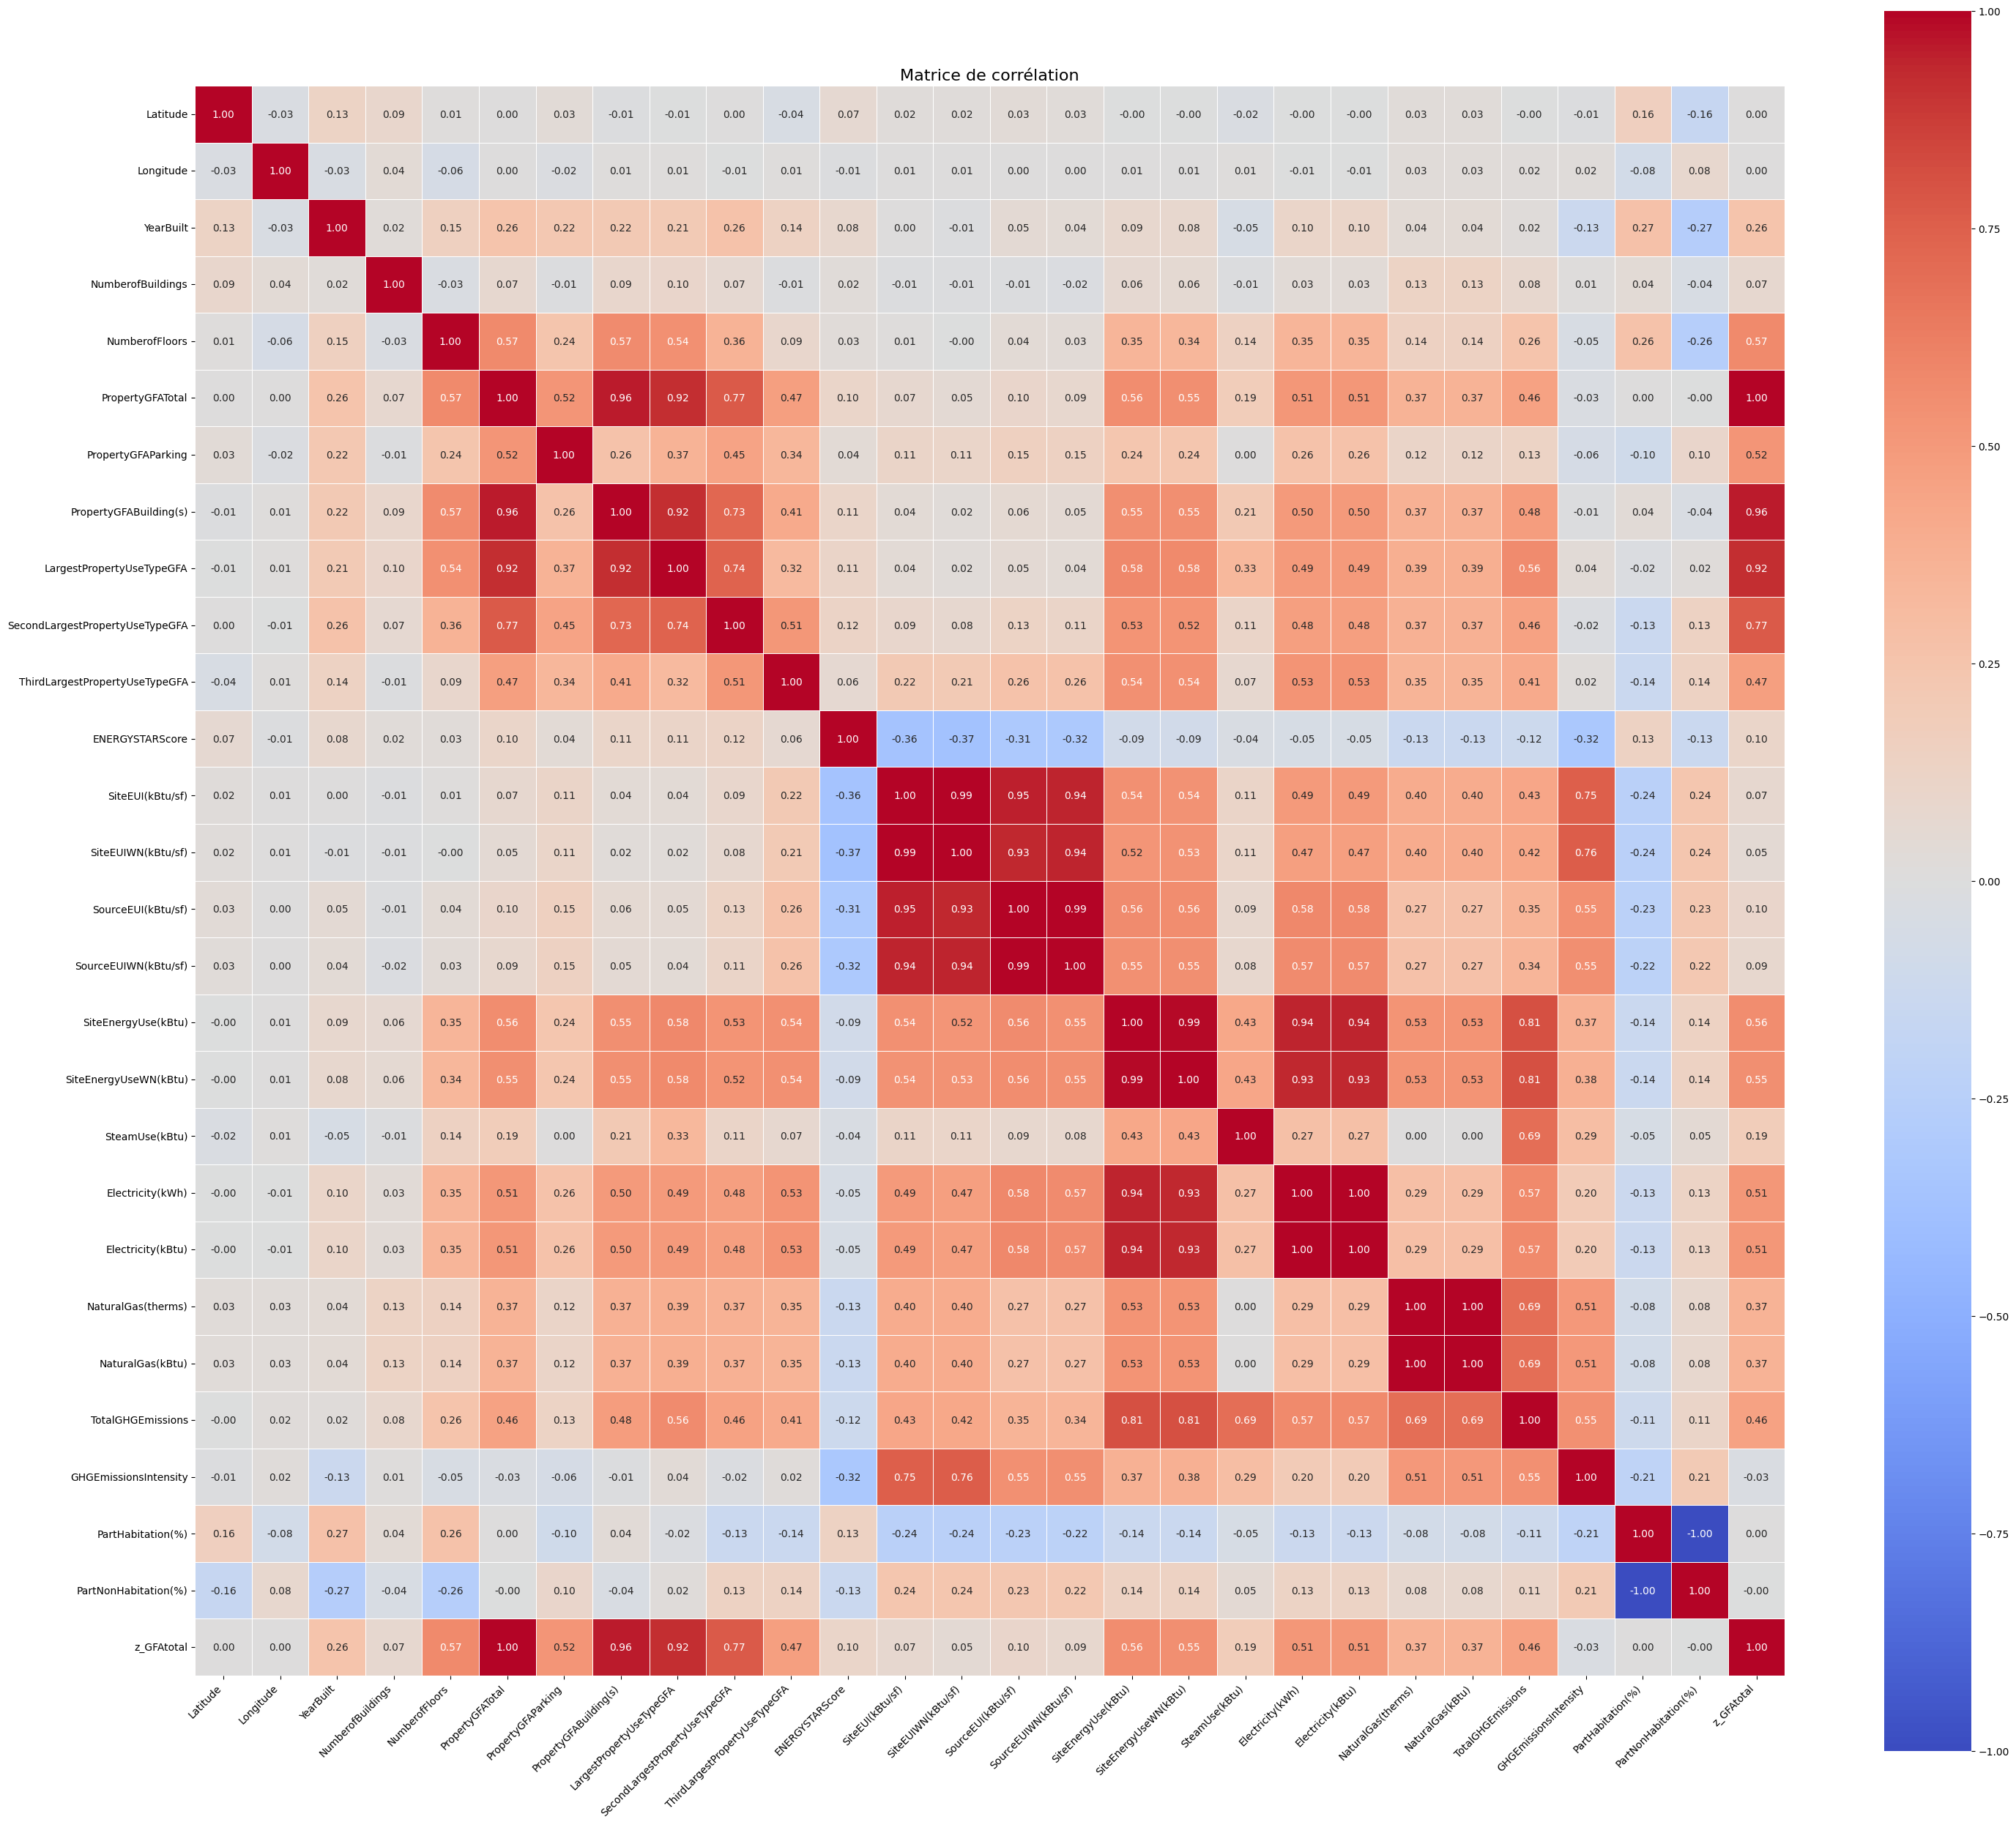

In [60]:
matrice_correlation_pearson = (
    building_consumption_filtré.corr(method='pearson', numeric_only=True)
)

plt.figure(figsize=(30, 30))

sns.heatmap(
    matrice_correlation_pearson,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Matrice de corrélation",
    fontsize=16
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("viz/Matrice de corrélation.png", dpi=300, bbox_inches="tight")
plt.savefig("viz/Matrice de corrélation.pdf", bbox_inches="tight")
plt.show()

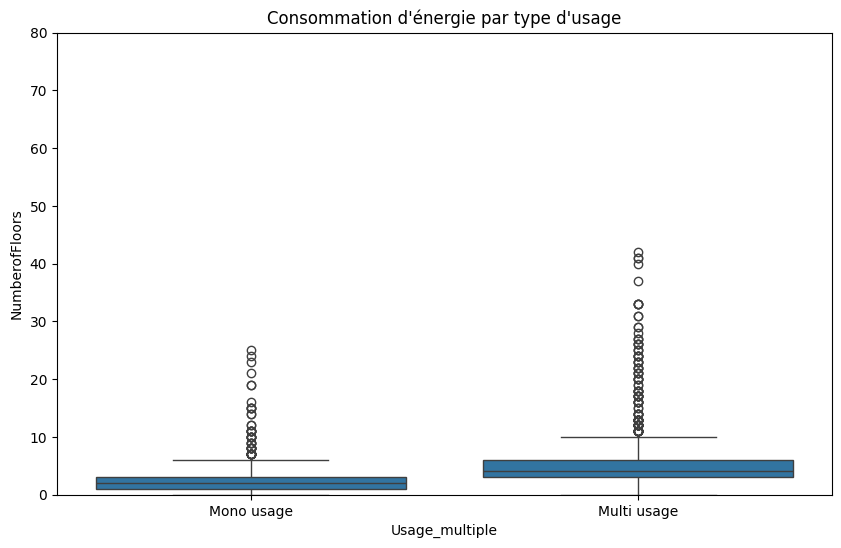

In [59]:
#Visualiation 1

plt.figure(figsize=(10, 6))
sns.boxplot(data=building_consumption_filtré, x="Usage_multiple", y="NumberofFloors")
plt.ylim(0, 80)
plt.title("Consommation d'énergie par type d'usage")
plt.savefig("viz/Consommation d'énergie par type d'usage.png", dpi=300, bbox_inches="tight")
plt.savefig("viz/Consommation d'énergie par type d'usage.pdf", bbox_inches="tight")
plt.show()

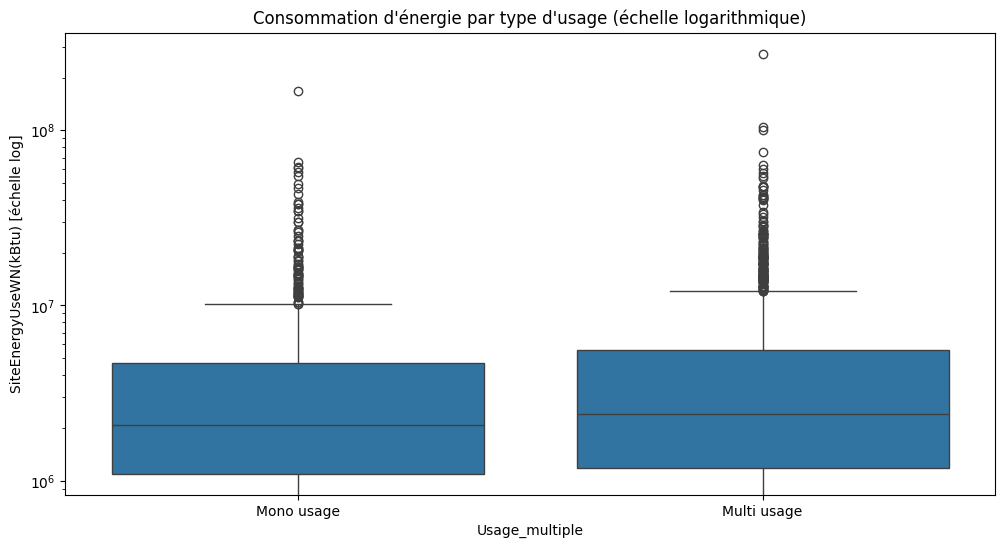

In [58]:
#Visualiation 2

plt.figure(figsize=(12, 6))
sns.boxplot(data=building_consumption_filtré, x="Usage_multiple", y="SiteEnergyUseWN(kBtu)")
plt.yscale("log")  
plt.title("Consommation d'énergie par type d'usage (échelle logarithmique)")
plt.ylabel("SiteEnergyUseWN(kBtu) [échelle log]")
plt.savefig("viz/Consommation d'énergie par type d'usage (échelle logarithmique).png", dpi=300, bbox_inches="tight")
plt.savefig("viz/Consommation d'énergie par type d'usage (échelle logarithmique).pdf", bbox_inches="tight")
plt.show()

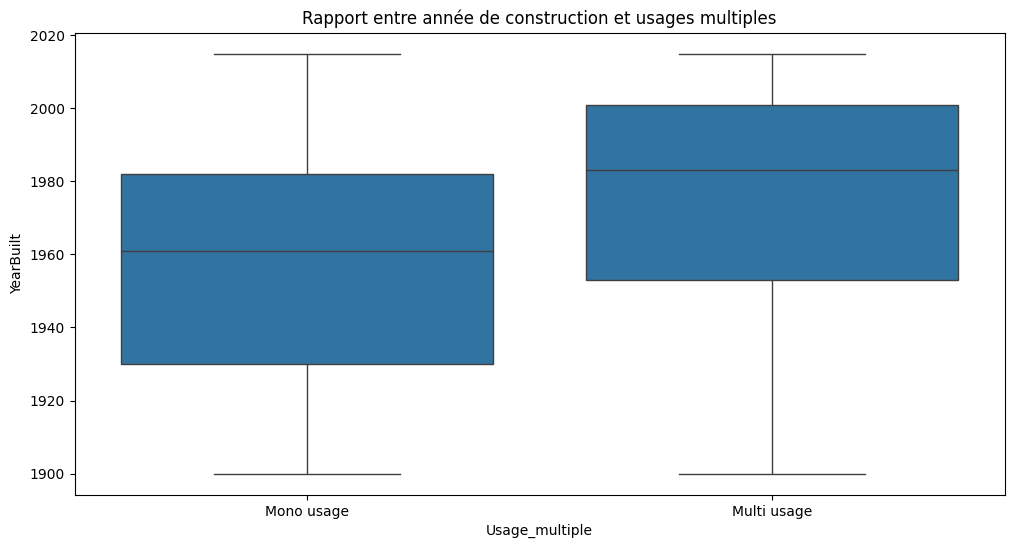

In [57]:
#Visualiation 3

plt.figure(figsize=(12, 6))
sns.boxplot(data=building_consumption_filtré, x="Usage_multiple", y="YearBuilt")
plt.title("Rapport entre année de construction et usages multiples")
plt.ylabel("YearBuilt")
plt.savefig("viz/Rapport entre année de construction et usages multiples.png", dpi=300, bbox_inches="tight")
plt.savefig("viz/Rapport entre année de construction et usages multiples.pdf", bbox_inches="tight")
plt.show()

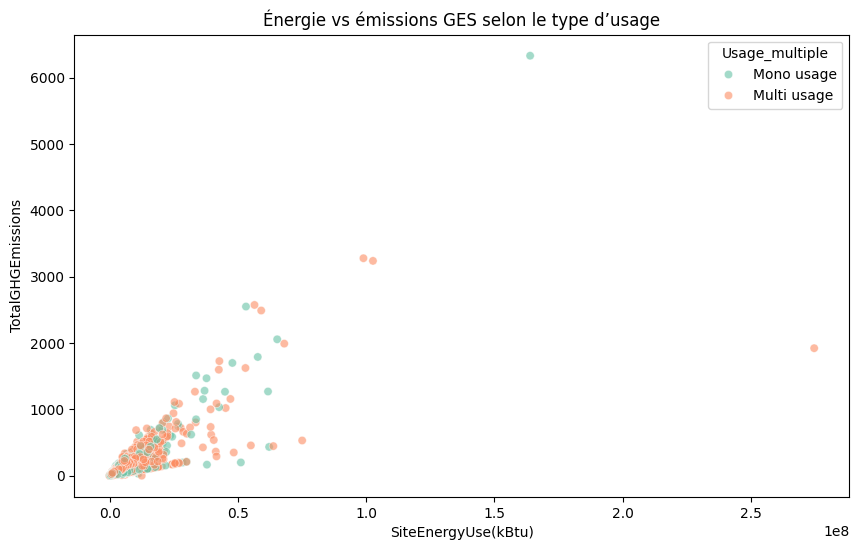

In [56]:
#Visualiation 4 Avec filtre sur les consommations pour enlever les 0

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=building_consumption_filtré,
    x="SiteEnergyUse(kBtu)",
    y="TotalGHGEmissions",
    hue="Usage_multiple",
    palette="Set2",
    alpha=0.6
)

plt.title("Énergie vs émissions GES selon le type d’usage")
plt.xlabel("SiteEnergyUse(kBtu)")
plt.ylabel("TotalGHGEmissions")
plt.savefig("viz/Énergie vs émissions GES selon le type d’usage.png", dpi=300, bbox_inches="tight")
plt.savefig("viz/Énergie vs émissions GES selon le type d’usage.pdf", bbox_inches="tight")
plt.show()

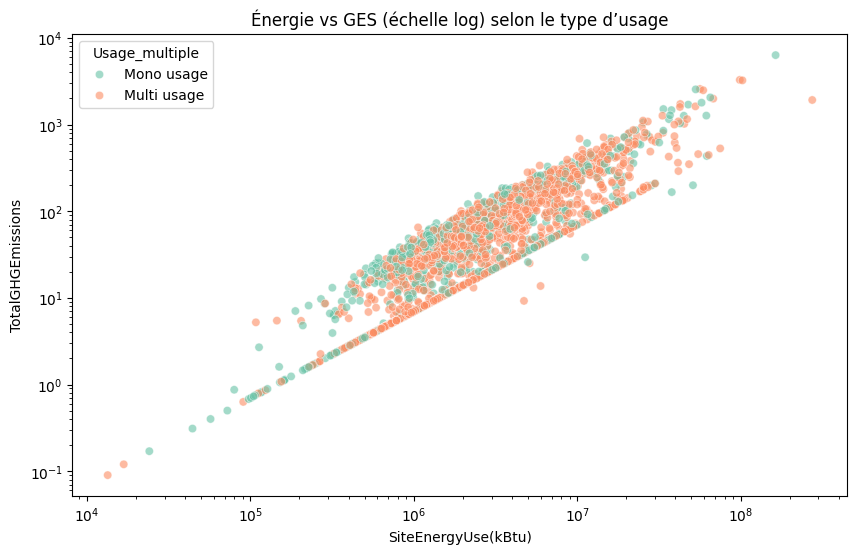

In [55]:
#Visualiation 5 Avec filtre sur les consommations pour enlever les 0

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=building_consumption_filtré,
    x="SiteEnergyUse(kBtu)",
    y="TotalGHGEmissions",
    hue="Usage_multiple",
    palette="Set2",
    alpha=0.6
)

plt.xscale("log")
plt.yscale("log")
plt.title("Énergie vs GES (échelle log) selon le type d’usage")
plt.xlabel("SiteEnergyUse(kBtu)")
plt.ylabel("TotalGHGEmissions")
plt.savefig("viz/Énergie vs GES (échelle log) selon le type d’usage.png", dpi=300, bbox_inches="tight")
plt.savefig("viz/Énergie vs GES (échelle log) selon le type d’usage.pdf", bbox_inches="tight")
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_37872\549708490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(building_consumption_filtré['SiteEUIWN(kBtu/sf)'])


<Axes: xlabel='SiteEUIWN(kBtu/sf)', ylabel='Density'>

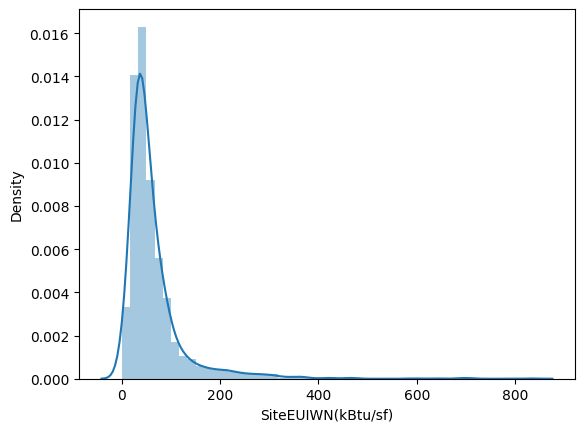

In [44]:
sns.distplot(building_consumption_filtré['SiteEUIWN(kBtu/sf)'])

In [45]:
# CODE PREPARATION DES FEATURES

building_consumption_pour_analyses = building_consumption_filtré.copy()

In [46]:
#Suppression des NA sur la cible :

building_consumption_pour_analyses = building_consumption_pour_analyses.loc[~building_consumption_pour_analyses['SiteEnergyUseWN(kBtu)'].isna(),:]

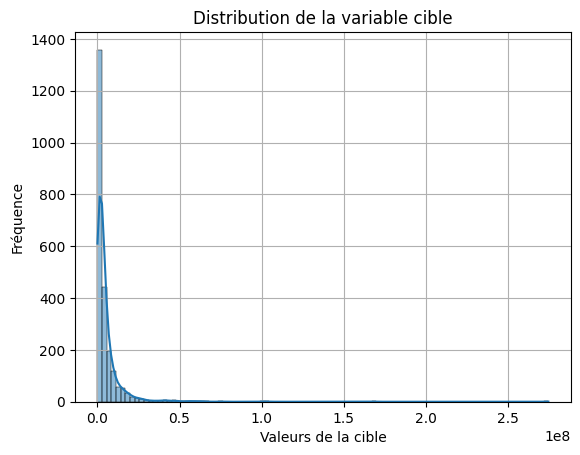

In [54]:
sns.histplot(building_consumption_pour_analyses['SiteEnergyUseWN(kBtu)'].dropna(), kde=True)
plt.title("Distribution de la variable cible")
plt.xlabel("Valeurs de la cible")
plt.ylabel("Fréquence")
plt.grid(True)
plt.savefig("viz/Distribution de la variable cible.png", dpi=300, bbox_inches="tight")
plt.savefig("viz/Distribution de la variable cible.pdf", bbox_inches="tight")  
plt.show()

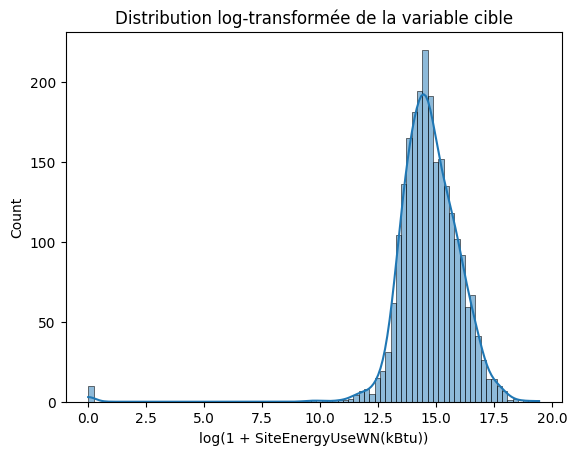

In [53]:
sns.histplot(np.log1p(building_consumption_pour_analyses['SiteEnergyUseWN(kBtu)'].dropna()), kde=True)
plt.title("Distribution log-transformée de la variable cible")
plt.xlabel("log(1 + SiteEnergyUseWN(kBtu))")
plt.savefig("viz/Distribution log-transformée de la variable cible.png", dpi=300, bbox_inches="tight")
plt.savefig("viz/Distribution log-transformée de la variable cible.pdf", bbox_inches="tight")
plt.show()

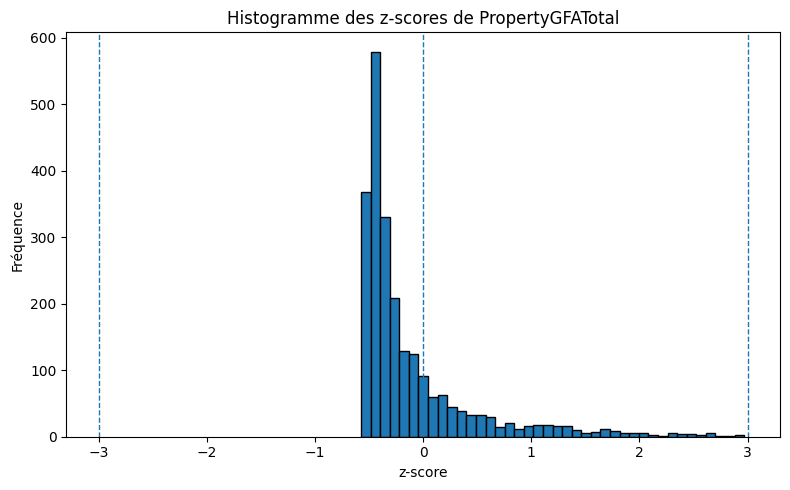

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(building_consumption_pour_analyses['z_GFAtotal'], bins=40, edgecolor='black')
plt.axvline(0, linestyle='--', linewidth=1)      # moyenne
plt.axvline( 3, linestyle='--', linewidth=1)     # seuil outliers typique
plt.axvline(-3, linestyle='--', linewidth=1)
plt.title("Histogramme des z-scores de PropertyGFATotal")
plt.xlabel("z-score")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.savefig("viz/hist_z_GFAtotal.png", dpi=300, bbox_inches="tight")
plt.savefig("viz/hist_z_GFAtotal.pdf", bbox_inches="tight")  
plt.show()

# Extraction du fichier CSV nettoyé pour l'analyse

In [51]:
building_consumption_pour_analyses.to_csv(
    "data/building_consumption_pour_analyses.csv", index=False, encoding="utf-8"
)